In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -Uqq duckduckgo_search

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

def search_images(term, max_images=200): 
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


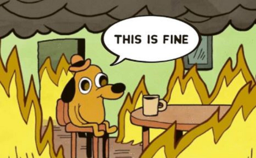

In [4]:
this_is_fine_urls = search_images('this is fine meme', max_images=1)
download_url(this_is_fine_urls[0], 'this_is_fine.jpg', show_progress=False)
Image.open('this_is_fine.jpg').to_thumb(256,256)

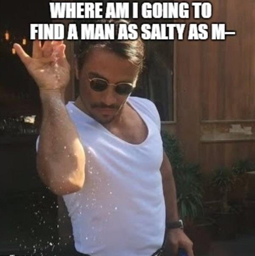

In [5]:
salt_bae_urls = search_images('salt bae meme', max_images=1)
download_url(salt_bae_urls[0], 'salt_bae.jpg', show_progress=False)
Image.open('salt_bae.jpg').to_thumb(256,256)

In [6]:
searches = "salt bae","this is fine"
path = Path('which_meme_is_this')
from time import sleep

for item in searches:
    dest = (path/item)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{item} meme'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{item} photo'))
    sleep(10)
    resize_images(path/item, max_size=400, dest=path/item) # 400 here splits into 200 for each item

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
print((path/searches[0]))

which_meme_is_this/salt bae


In [8]:
fns = get_image_files(path)
fns

(#347) [Path('which_meme_is_this/this is fine/82b52b40-e35f-42d8-92e3-79168fbe8467.jpg'),Path('which_meme_is_this/this is fine/d9b77501-60b2-441b-bff5-f1045bbca1fb.jpg'),Path('which_meme_is_this/this is fine/cdd8397d-e464-49a6-8a28-3b4e2e5265f8.jpg'),Path('which_meme_is_this/this is fine/f7704c4b-ec32-4138-8b78-20d50e8747be.jpg'),Path('which_meme_is_this/this is fine/06358472-ff6a-42d2-bb62-e7ef4a02c69b.png'),Path('which_meme_is_this/this is fine/f13a6314-8e06-471d-ba96-8fcea1e5ceca.jpg'),Path('which_meme_is_this/this is fine/c03eb16a-f58d-4784-97ac-45ba6a510439.png'),Path('which_meme_is_this/this is fine/73795291-6283-43ef-b4d1-0afe2495cbbf.jpg'),Path('which_meme_is_this/this is fine/a066d8e1-2b26-4040-92e8-47349d977ef1.png'),Path('which_meme_is_this/this is fine/569b8c04-ee91-4aee-a1f1-bfd257d4f137.png')...]

In [9]:
type(fns[1])

pathlib.PosixPath